In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier

### Creating Dataframe

In [3]:
df=pd.read_csv(r'C:\Users\Daniel\Gabi\fashion-mnist_train.csv')
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train = df.drop('label',axis=1)
y_train = df['label']

In [5]:
s = df['label']
s.value_counts()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: label, dtype: int64

In [6]:
df['pixel10'].value_counts()

0      45168
1       1602
2        944
3        481
4        290
       ...  
239        1
238        1
233        1
247        1
249        1
Name: pixel10, Length: 252, dtype: int64

### Using pca to use less featchers but still getting a good reasult because using more then 95 pracent 

In [7]:
pca = PCA()
XDR = pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

### The number of daimentins(less then 784, the original number)

In [8]:
d

187

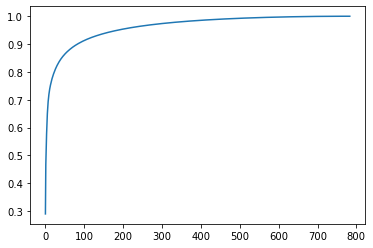

In [9]:
plt.plot(cumsum)

### Fitting and transforming X_train

In [10]:
from sklearn.decomposition import IncrementalPCA
n_batches = 40
inc_pca = IncrementalPCA(n_components=187)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_train = inc_pca.transform(X_train)

In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

## Using several models after pca : xgboost,adaboost,decisionTree,Randomforet

In [12]:
xgb_clf = xgb.XGBClassifier(eval_metric = 'mlogloss')
xgb_clf.fit(X_train, y_train)

C:\Users\Daniel\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [13]:
ad =AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME.R').fit(X_train, y_train)

In [15]:
dt = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=0),n_estimators=10, random_state=0).fit(X_train, y_train)

In [16]:
ranfor = BaggingClassifier(base_estimator=RandomForestClassifier(),
                      n_estimators=10, random_state=0).fit(X_train, y_train)

## Creating the test set

In [17]:
dfRes=pd.read_csv(r'C:\Users\Daniel\Gabi\fashion-mnist_test.csv')
dfRes

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [18]:
X_test = dfRes.drop('label',axis=1)
y_test = dfRes['label']

### Transforming and fitting the data

In [19]:
X_test = inc_pca.transform(X_test)

In [20]:
X_test = sc.fit_transform(X_test)

## showing results for the  models after pca: xgboost,adaboost,decisionTree,Randomforet

In [21]:
xgb_clf.score(X_test, y_test)

0.8859

In [22]:
ad.score(X_test, y_test)

0.5181

In [24]:
dt.score(X_test, y_test)

0.8278

In [25]:
ranfor.score(X_test, y_test)

0.8621

In [39]:
estimators = [('xg', xgb_clf),('dt',dt)]

In [35]:
from sklearn.metrics import accuracy_score

### Showing the result by using voting

In [38]:
voting_clf = VotingClassifier(
 estimators=[('xg', xgb_clf ),('rn',ranfor),('dt',dt)],
 voting='soft')
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
print(accuracy_score(y_pred, y_test))

C:\Users\Daniel\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.8797


### Showing the result by using Stacking

In [40]:
lala = StackingClassifier(
   estimators=estimators, final_estimator=ranfor,n_jobs=-1)

In [41]:
lala.fit(X_train, y_train).score(X_test, y_test)

0.8874

### conclusins:
#### we are getting the best result after using pca when we are doing stacking on several models , the best result is 88.74%
### note: I coud try to run a few more things that could help me(maybe) to improve a little bit my result like randomseraarch/gridSearch on models but to run it takes me more than 40 hours so i have decided to show the use of them on differant notebooks' .